# 線性迴歸 (Linear Regression)

## 簡單線性迴歸

In [33]:
import numpy as np
import pandas as pd

# 讀取波士頓房價數據集
# 官方不建議使用，因為有道德問題
# 由於 B 欄位的關係，認為種族自我隔離對房間有正面的影響
# 網址: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/datasets/data/boston_house_prices.csv
df = pd.read_csv('ex2.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


| 欄位名稱 | 說明 |
| -------- | ---- |
| CRIM | 人均犯罪率 |
| ZN | 25,000平方英尺以上民用土地的比例 |
| INDUS | 城鎮非零售業商用土地比例 |
| CHAS | 是否鄰近查爾斯河，1是鄰近，0是不鄰近 |
| NOX | 一氧化氮濃度（千萬分之一，10 ppm） |
| RM | 住宅的平均房間數 |
| AGE | 自住且建於1940年前的房屋比例 |
| DIS | 到5個波士頓就業中心的加權距離 |
| RAD | 到高速公路的便捷度指數 |
| TAX | 每一萬美元的不動產稅率 |
| PTRATIO | 城鎮學生教師比例 |
| B | 1000*(Bk − 0.63)^2，其中 Bk 是城鎮中黑人比例 |
| LSTAT | 低收入人群比例 |
| MEDV | 房價。自住房中位數價格，單位是千元 |

In [34]:
# 敘述性統計
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
# 檢查是否有遺漏值(也可用 df.info())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

w_0 = [-34.67062078]
w_1 = [9.10210898]


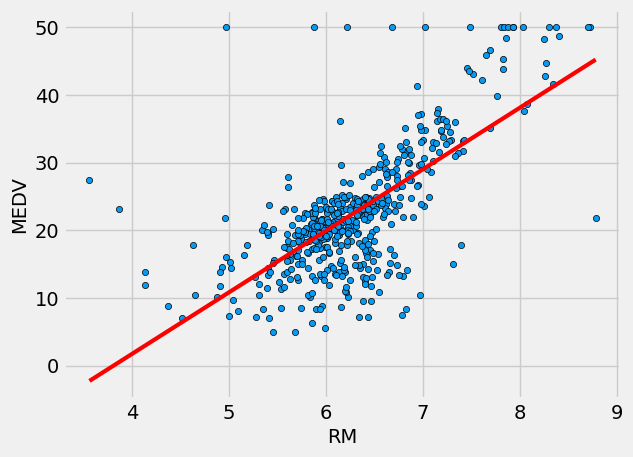

In [36]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 取出特徵與標記
x, y = df.loc[:, ['RM']], df.loc[:, ['MEDV']]

# 建立線性迴歸模型
lr = LinearRegression()

# 訓練模型
lr.fit(x, y)

# 印出截距與係數
print('w_0 =', lr.intercept_)
print('w_1 =', lr.coef_[0])


# 繪製散佈圖
plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)


# 繪製迴歸線
n_x = np.linspace(x.min(), x.max(), 100)

# 公式: y = w_0 + w_1 * x
# 意思是 y = 截距 + 係數 * x
n_y = lr.intercept_ + lr.coef_[0] * n_x

# 繪製迴歸線
plt.plot(n_x, n_y, color='r', lw=3) # lw: 線寬

w_0 = [-4.43892061e-16]
w_1 = [0.69535995]


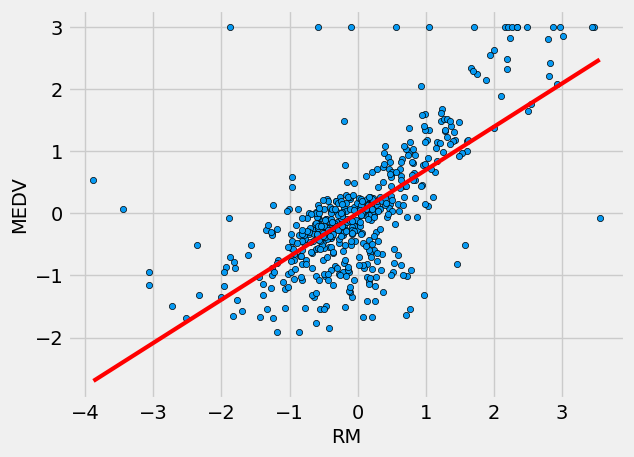

In [37]:
from sklearn.preprocessing import StandardScaler

# 對 x 和 y 都進行標準化
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

# 建立線性迴歸模型
lr = LinearRegression()

# 訓練模型
lr.fit(x, y)

# 印出截距與係數
print('w_0 =', lr.intercept_)
print('w_1 =', lr.coef_[0])
'''
標準化有個特色，就是線性迴歸的截距會變成 0 (線條會從通過原點，W_0 = 0)
'''

# 繪製散佈圖
plt.scatter(x, y, facecolor='xkcd:azure', edgecolor='black', s=20)
plt.xlabel('RM', fontsize=14)
plt.ylabel("MEDV", fontsize=14)


# 取得標準化後的迴歸線
n_x = np.linspace(x.min(), x.max(), 100)

# 公式: y = w_0 + w_1 * x，計算出標準化後的迴歸線所對應的 y
n_y = lr.intercept_ + lr.coef_[0] * n_x

# 繪製迴歸線
plt.plot(n_x, n_y, color='r', lw=3)
plt.show()

## 多元線性迴歸

In [38]:
from sklearn.linear_model import LinearRegression

# 取出特徵與標記，其中特徵為 RM 與 LSTAT (房間數與低收入人口比例)
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

# 建立線性迴歸模型
lr = LinearRegression()
lr.fit(X, y)

# 印出截距與係數
print('[w_1, w_2] =', lr.coef_[0])
print('w_0 =', lr.intercept_)

[w_1, w_2] = [ 5.09478798 -0.64235833]
w_0 = [-1.35827281]


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

'''
共線性: 
當特徵之間存在高度相關時，會導致模型的不穩定性，這種情況稱為共線性。
將有共線性的特徵放入模型中，會提高某些自變數的解釋力與預測力，
使得建構好的模型有偏差。
'''

'''
變異膨脹因子 (VIF) 是用來檢測特徵之間是否存在共線性的指標

VIF 的值越大，表示特徵之間的共線性越高，對於模型的解釋性會有所影響，值愈大愈不好
statsmodels 套件在計算 VIP 時，會建議大於 5 即存在共線性問題
網路上認為，大於 10 即存在共線性問題，或許可以將 10 視為一個參考值
'''

# 新增一欄位 constant，用常數填充
df['constant'] = 1

# 取出特徵
df_vif = pd.DataFrame()
df_vif['feature'] = df.columns
df_vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# 移除新增的列 (拿掉 constant 那一列)
df_vif = df_vif.drop(index=df_vif.index[-1])
df_vif

,feature,VIF
0,CRIM,1.831537
1,ZN,2.352186
2,INDUS,3.992503
3,CHAS,1.095223
4,NOX,4.586920
5,RM,2.260374
6,AGE,3.100843
7,DIS,4.396007
8,RAD,7.808198
9,TAX,9.205542


In [40]:
import statsmodels.api as sm

# 取出特徵與標記
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

# 在特徵中加入常數項
X = sm.add_constant(X)

# 建立線性迴歸模型
model = sm.OLS(y, X)

# 訓練模型
result = model.fit()

# 印出截距與係數
print('迴歸係數：')
print(result.params)

'''
R-squared (R平方) 是用來評估模型的解釋力，值越接近 1 表示模型的解釋力越好
'''

# 印出 R-squared
result.summary()

迴歸係數：
const   -1.358273
RM       5.094788
LSTAT   -0.642358
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          7.01e-112
Time:                        01:48:09   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 評估迴歸模型的效能

### 檢視資料切分結果

In [41]:
from sklearn.model_selection import train_test_split

# 取出特徵與標記
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

# 將資料分為訓練與測試資料集
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=0
)

# 輸出訓練與測試資料集的大小
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


### 評估指標

#### MSE (Mean Squared Error)

In [42]:
from sklearn.metrics import mean_squared_error

# 建立線性迴歸模型
lr = LinearRegression()

# 訓練模型
lr.fit(X_train, y_train)

# 預測訓練資料集
y_train_pred = lr.predict(X_train)

# 預測試資料集
y_test_pred = lr.predict(X_test)

# 輸出 MSE
print(f'MSE(training): {mean_squared_error(y_train, y_train_pred)}')
print(f'MSE(testing): {mean_squared_error(y_test, y_test_pred)}')

MSE(training): 28.790276482053443
MSE(testing): 37.38310563877995


注意：評估是一種比較的過程，除了用不同指標進行評估外，也可以透過不同模型之間的比較來評估模型的優劣，視覺化也可以幫助我們了解模型的表現。

#### Coefficient of Determination (R^2)

In [43]:
from sklearn.metrics import r2_score

'''
R^2 (R平方) 是用來評估模型的解釋力，介於 0 ~ 1 之間，
值越接近 1 表示模型的解釋力越好。

至於「好」要多少，沒有一個明確的標準，但可以參考以下的規則：
- 0.7 以上: 模型的解釋力很好
- 0.5 ~ 0.7: 模型的解釋力一般
- 0.5 以下: 模型的解釋力較差

社會科學領域的研究，R^2 介於 0.5 ~ 0.6 之間就可以接受，
但在校正精密儀器時，則會被要求到 0.999 的 R^2。
'''

print(f'R^2(training): {r2_score(y_train, y_train_pred)}')
print(f'R^2(testing): {r2_score(y_test, y_test_pred)}')

R^2(training): 0.6618625964841893
R^2(testing): 0.5409084827186418


#### 提升 R^2 的方法

##### 1. 增加自變數

In [44]:
# 隨機增加無關的 4 個特徵(數值介於 0 ~ 1 之間)
np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)

# 將隨機增加的特徵加入原本的特徵中
df_rand = pd.DataFrame(
    data=rand_n, 
    columns=['A', 'B', 'C', 'D'] # 等同於 list('ABCD')
)
X = pd.concat([X, df_rand], axis=1)


# 計算 R^2
def linReg_R2(X, y):
    # 將資料分為訓練與測試資料集
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2,
        random_state=0
    )
    
    # 建立線性迴歸模型 (含訓練)
    lr = LinearRegression().fit(X_train, y_train)
    
    # 預測訓練資料集
    y_train_pred = lr.predict(X_train)
    
    # 預測測試資料集
    y_test_pred = lr.predict(X_test)
    
    print(f'R^2(training): {r2_score(y_train, y_train_pred)}')
    print(f'R^2(testing): {r2_score(y_test, y_test_pred)}')


print(X.shape)
print('=== 1.隨機增加無關的 4 個特徵 ===')
linReg_R2(X, y)

(506, 6)
=== 1.隨機增加無關的 4 個特徵 ===
R^2(training): 0.662936849980776
R^2(testing): 0.5417916236895272


##### 2. 擴大數據點的分布範圍

In [45]:
# 取得特徵 RM 與 LSTAT，以及 MEDV
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

# 增加 1 筆數據
X.loc[len(X)] = [50, 100]

# 增加 1 筆數據
y.loc[len(y)] = [200]

print(X.shape)
print('=== 2.增加 1 筆數據 ===')
linReg_R2(X, y)

(507, 2)
=== 2.增加 1 筆數據 ===
R^2(training): 0.6581962508042997
R^2(testing): 0.9058084916935747


##### 3. 減少樣本數

In [46]:
# 將特徵與標記整合
X_y = df.loc[:, ['RM','LSTAT', 'MEDV']]

# 依照 MEDV 進行分組
df_group = X_y.groupby(['MEDV'])

# 儲存平均值
lst = []
for name, _ in df_group:
    lst.append(df_group.get_group(name).mean().tolist())

# 將每一個特徵 (含標記) 的平均值存入 DataFrame
df_new = pd.DataFrame(data=lst, columns=['RM','LSTAT', 'MEDV'])

# 取出特徵與標記
X, y = df_new.loc[:, ['RM','LSTAT']], df_new.loc[:, ['MEDV']]

print(df_new.shape)
print('=== 3.減少樣本數 ===')
linReg_R2(X, y)

(229, 3)
=== 3.減少樣本數 ===
R^2(training): 0.8273644762658373
R^2(testing): 0.8724450472944864


注意：
- R^2 很大也不一定有實質的意義，一昧地追求 R^2 的提升，可能會導致過度擬合 (Overfitting) 的問題。
- 為了緩和增加自變數或減少樣本導致 R^2 莫名提升的問題，我們可以使用 Adjusted R^2 來進行評估。

In [47]:
# 利用公式計算 Adj. R^2
'''
r2: R^2
n: 資料筆數
k: 特徵數量
'''
def adj_R2(r2, n, k):
    return 1 - (n-1)*(1-r2)/(n-k-1)

# 計算 Adj. R^2
def linReg_adj_R2(X, y):
    # 將資料分為訓練與測試資料集
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2,
        random_state=0
    )

    # 建立線性迴歸模型 (含訓練)
    lr = LinearRegression().fit(X_train, y_train)

    # 預測訓練資料集
    y_train_pred = lr.predict(X_train)

    # 預測測試資料集
    y_test_pred = lr.predict(X_test)

    # 計算 R^2
    r2_train = r2_score(y_train, y_train_pred)

    # 計算 R^2
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f'Adj. R^2(training): {adj_R2(r2_train, X_train.shape[0], X_train.shape[1])}')
    print(f'Adj. R^2(testing): {adj_R2(r2_test, X_test.shape[0], X_test.shape[1])}')

# 取得特徵 RM 與 LSTAT，以及 MEDV
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]


print(X.shape)
print('=== 原始數據 ===')
linReg_adj_R2(X, y)

# 隨機增加無關的 4 個特徵(數值介於 0 ~ 1 之間)
np.random.seed(0)
rand_n = np.random.rand(X.shape[0], 4)
df_rand = pd.DataFrame(
    data=rand_n, 
    columns=list('ABCD') # 等同於 ['A', 'B', 'C', 'D']
)

# 將隨機增加的特徵加入原本的特徵中
X = pd.concat([X, df_rand], axis=1)


print(X.shape)
print('=== 隨機增加無關的 4 個特徵 ===')
linReg_adj_R2(X, y)

(506, 2)
=== 原始數據 ===
Adj. R^2(training): 0.6601761256437115
Adj. R^2(testing): 0.5316339066119476
(506, 6)
=== 隨機增加無關的 4 個特徵 ===
Adj. R^2(training): 0.6578426965799817
Adj. R^2(testing): 0.5128521472909711


### 殘差分析 (Residual Analysis)

注意：
- 殘差（Residual）指的是觀察值（樣本）與預測值（估計值）之間的差異。
- 誤差（Error）指的是觀察值（樣本）與真實值（Ground Truth）之間的偏離。

#### 1. 檢驗常態性：檢查殘差是否符合常態分佈

#### Shapiro-Wilk 檢定 (SW test)

In [48]:
import statsmodels.api as sm
from scipy.stats import shapiro

# 取出特徵與標記
X, y = df.loc[:, ['RM','LSTAT']], df.loc[:, ['MEDV']]

# 增加常數行作為截距項
X = sm.add_constant(X)  

# 建立 OLS 模型 (迴歸模型)
model = sm.OLS(y, X).fit()

# Shapiro-Wilk 常態性檢定 (樣本數量小於等於 2000 時使用)
stat, p = shapiro(model.resid)
print(f'Statistics: {stat}, p-value: {p}')
alpha = 0.05

'''
H0: 資料來自常態分布
H1: 資料不來自常態分布
'''
if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 0.9098000754443145, p-value: 9.092123030573736e-17
看起來不是常態分布（拒絕H0）


#### Kolmogorov-Smirnov 檢定 (KS test)

In [49]:
from scipy.stats import kstest

# Kolmogorov-Smirnov 常態性檢定 (樣本數量大於 2000 時使用)
stat, p = kstest(model.resid, 'norm')

print(f'Statistics: {stat}, p-value: {p}')
alpha = 0.05

'''
H0: 資料來自常態分布
H1: 資料不來自常態分布
'''
if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 0.37880962928472933, p-value: 9.254848877421259e-66
看起來不是常態分布（拒絕H0）


#### D’Agostino-Pearson omnibus 檢定

In [50]:
from scipy.stats import normaltest

# D’Agostino-Pearson omnibus 常態性檢定
stat, p = normaltest(model.resid)
print(f'Statistics: {stat}, p-value: {p}')
alpha = 0.05

'''
H0: 資料來自常態分布
H1: 資料不來自常態分布
'''
if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 145.7119454320208, p-value: 2.285878146706624e-32
看起來不是常態分布（拒絕H0）


#### Jarque-Bera 檢定 (JB test)

In [51]:
from scipy.stats import jarque_bera

# Jarque-Bera 常態性檢定
stat, p = jarque_bera(model.resid)
print(f'Statistics: {stat}, p-value: {p}')
alpha = 0.05

'''
H0: 資料來自常態分布
H1: 資料不來自常態分布
'''
if p > alpha:
    print('看起來是常態分布（無法拒絕H0）')
else:
    print('看起來不是常態分布（拒絕H0）')

Statistics: 457.68991579974244, p-value: 4.11052763877968e-100
看起來不是常態分布（拒絕H0）


#### QQ 圖

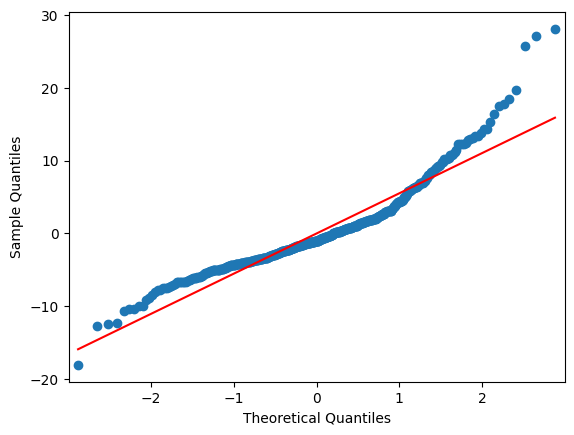

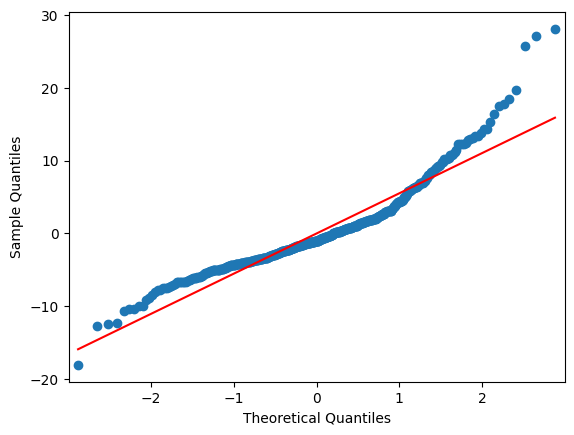

In [32]:
from statsmodels.graphics.gofplots import qqplot

qqplot(model.resid, line='s')

#### 2. 檢驗獨立性：檢查殘差是否有自相關性，殘差項之間應該要相互獨立。

殘差可能彼此相關的例子：

1. 遺漏關鍵變數（Omitted Variable）：

    如果模型中缺少了重要的解釋變數，而這些變數與時間、空間或其他順序有關，殘差可能會捕捉到這些未包含的因素，導致自相關。

    例子：假設我們在預測汽車銷售量時，只考慮了廣告支出，但忽略了經濟狀況這一關鍵因素。經濟狀況往往具有時間上的連續性（例如，經濟繁榮或衰退可能持續數個季度），因此，殘差會反映出這種遺漏的時間依賴性，導致殘差之間的自相關。

2. 時間序列資料中的時間依賴性：

    在時間序列資料中，觀測值往往與之前的觀測值相關。如果模型未能適當處理這種時間依賴性，殘差之間就會呈現自相關。

    例子：在預測每日氣溫時，當天的氣溫通常與前一天的氣溫相關。如果我們使用一個簡單的線性回歸模型，只以月份為解釋變數，而未考慮前一天的氣溫，殘差可能會顯示出自相關性，因為模型未捕捉到氣溫的連續性。

3. 模型形式錯誤（Model Misspecification）：

    如果選擇了錯誤的模型形式，例如，真實的關係是非線性的，但使用了線性模型，殘差可能會顯示系統性的模式和自相關。

    例子：假設實際上收入與工作經驗之間是拋物線關係，但我們使用線性回歸模型。殘差會呈現出系統性的曲線形態，相鄰的殘差值可能相關，顯示出自相關性。

4. 測量誤差的相關性：

    如果測量誤差本身具有相關性，例如由於儀器漂移或系統性誤差，殘差之間可能會相關。

    例子：在連續生產的過程中，測量設備可能隨時間產生誤差累積。如果未校正這種誤差，殘差可能會顯示出隨時間變化的模式，導致自相關。

5. 順序效應或學習效應：

    在實驗或調查中，受試者或受訪者可能隨著時間的推移而改變他們的行為，導致殘差相關。

    例子：在測試新藥的臨床試驗中，患者可能隨著時間產生耐藥性。如果模型未考慮這種變化，殘差可能會顯示出時間上的自相關。

6. 空間自相關（Spatial Autocorrelation）：

    在地理資料中，鄰近地區的觀測值可能相關。如果模型未包含空間位置等變數，殘差可能會在空間上相關。

    例子：在分析城市房價時，鄰近地區的房價往往相似。如果模型未考慮地理位置因素，殘差可能會顯示空間自相關。

##### Durbin-Watson (DW-test)

In [52]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)

print(f'dw: {dw}')
'''
當 dw 接近或大於 2 的時候，誤差項是獨立的 (具有獨立性)。
誤差項不獨立的話，會導致模型的預測能力下降，
因此需要進行修正，例如增加特徵或改變模型等方式。

該統計量值越接近 2 越好，

如果 DW = 2，則表示沒有自相關，
0 < DW < 2 表示正自相關，
2 < DW < 4 表示負自相關。
'''

if 2 <= dw <= 4:
    print('誤差項獨立')
elif 0 <= dw < 2:
    print('誤差項不獨立')
else:
    print('計算錯誤')

dw: 0.8342146070001705
誤差項不獨立


#### 3. 變異數同質性：檢查殘差的變異數是否相等。

##### 繪製殘差圖

##### 使用 LOWESS (Locally Weighted Scatterplot Smoothing)：局部加權散點圖平滑法

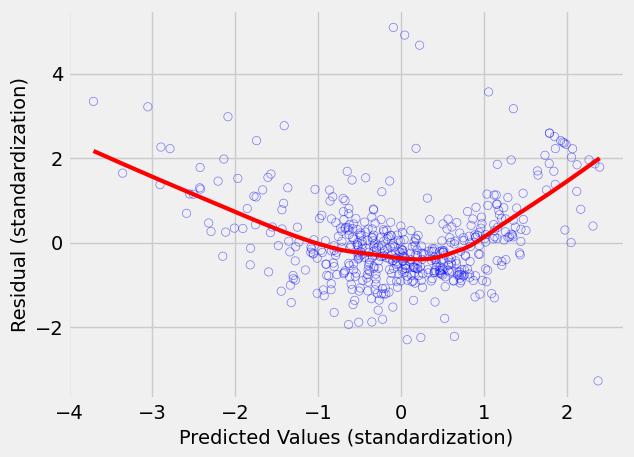

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.nonparametric.smoothers_lowess import lowess

# 假設 model.predict(X) 給出預測值，model.resid 給出殘差
df_resid = pd.DataFrame()
df_resid['y_pred'] = model.predict(X)
df_resid['resid'] = model.resid

# 標準化數據
scaler = StandardScaler()
df_resid_scaled = scaler.fit_transform(df_resid)
'''
array([[ 0.87279776, -0.8944939 ],
       [ 0.40198055, -0.7031752 ],
       [ 1.37919763,  0.36947786],
       ...,
       [ 1.09331282, -1.20570187],
       [ 0.89353027, -1.28412014],
       [ 0.24089811, -2.24510197]])
'''

# 提取標準化的預測值和殘差
x = df_resid_scaled[:, 0]  # 標準化的預測值
y = df_resid_scaled[:, 1]  # 標準化的殘差

# 繪製散點圖
plt.scatter(x, y, facecolors='none', edgecolors='blue', alpha=0.5)

# 計算 Lowess 曲線
lowess_curve = lowess(y, x, frac=0.6667)
'''
y: 殘差
x: 預測值
frac: 控制平滑程度，值越大，平滑程度越高
'''

# 繪製 Lowess 曲線
plt.plot(lowess_curve[:, 0], lowess_curve[:, 1], color='red', lw=3)

# 添加標籤
plt.xlabel('Predicted Values (standardization)', fontsize=14)
plt.ylabel('Residual (standardization)', fontsize=14)

'''
理想上，紅色的線要靠近 0 的位置，並且在 0 附近橫向分佈。
可以看出殘差變異數不符合同質性。
'''

# 顯示圖形
plt.show()

## 正規化的迴歸